## Perceptron - different alfas

In [20]:
import pandas as pd
from data import *
plt.style.use('ggplot')

In [21]:
repetitions = 200
estimate_func = lambda v: bipolar(0, v)
x_all = reproduce_x_times(x_bipolar, repetitions)
d_all = reproduce_x_times(d_bipolar, repetitions)
x_all = x_all + get_random_except_first_row(x_all.shape)
x_all[:, :5], d_all[:, :5]

(array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [-1.01041843, -0.96307553,  0.99806846,  0.95822898, -0.96538746],
        [-1.0290717 ,  1.02594702, -1.0249643 ,  0.99063429, -1.03533947]]),
 array([[-1, -1, -1,  1, -1]]))

(array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [-0.96444804, -1.02074041,  0.9753529 ,  0.96489214, -1.02453463],
        [-0.99237103,  1.04438305, -1.04519649,  1.04685272, -1.01454514]]),
 array([[-1, -1, -1,  1, -1]]))

In [22]:
test_size = int(x_all.shape[1] * 0.25)
train_size = int(x_all.shape[1] - test_size)
x_train, x_test = x_all[:, :train_size], x_all[:, train_size:]
d_train, d_test = d_all[:, :train_size], d_all[:, train_size:]
x_train.shape, x_test.shape, d_train.shape, d_test.shape

((3, 600), (3, 200), (1, 600), (1, 200))

((3, 600), (3, 200), (1, 600), (1, 200))

In [23]:
x_range = np.arange(-2, 4)
experiments_numb = 1000

### Dane experymentów

In [24]:
perceptrons = []
for alfa in list(np.linspace(0, 1, num=100))[1:]:
    p = Perceptron(x_train, d_train, x_test, d_test, estimate_func, alfa, (-0.1, 0.1))
    for i in range(experiments_numb):
        p.count()
    perceptrons.append(p)
len(perceptrons)

99

99

,α,average epoch count
0,0.010101,2.847
1,0.020202,2.848
2,0.030303,2.869
3,0.040404,2.848
4,0.050505,2.859
...,...,...
94,0.959596,2.866
95,0.969697,2.844
96,0.979798,2.849
97,0.989899,2.835


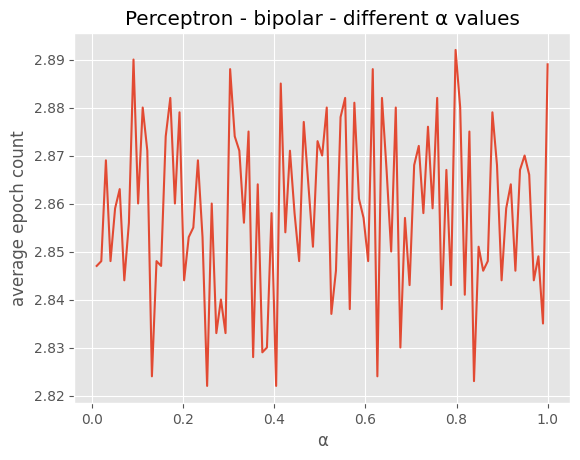

In [27]:
x, y = [v.alfa for v in perceptrons], [v.average_epoch_count for v in perceptrons]
plt.plot(x, y)
plt.title("Perceptron - bipolar - different α values")
plt.xlabel("α")
plt.ylabel("average epoch count")
# plt.ylim(0, 3)
pd.DataFrame({"α":x, "average epoch count":y})